# **Skin Diseases**
---

## **List of Diseases:**
1. **Scabies (Kudis)**: Infeksi kulit yang disebabkan oleh tungau kudis, menyebabkan rasa gatal yang parah.
2. **Cat Flea (Kutu Kucing)**: Parasit yang menyebabkan gatal-gatal pada kucing dan dapat menulari manusia.
3. **Abses**: Kumpulan nanah di dalam jaringan tubuh, sering disebabkan oleh infeksi bakteri.
4. **Dermatitis**: Peradangan kulit yang bisa disebabkan oleh alergi, iritasi, atau infeksi.
5. **Jamur**: Infeksi kulit yang disebabkan oleh jamur, menyebabkan gejala seperti gatal dan kemerahan.

## **List of Symptoms:**
1. **Krusta**: Kerak kering yang terbentuk di atas kulit, sering kali disebabkan oleh peradangan atau infeksi.
2. **Kutuan**: Infestasi kutu, parasit kecil yang hidup di bulu binatang dan bisa menyebabkan gatal-gatal.
3. **Gatal**: Sensasi terbakar atau ingin menggaruk pada kulit, bisa disebabkan oleh berbagai faktor termasuk alergi, infeksi, atau masalah kulit lainnya.
4. **Kulit Keropeng**: Kulit yang terbentuk keropeng, mungkin karena luka, infeksi, atau peradangan.
5. **Bulu Rontok**: Kehilangan rambut secara tidak normal, bisa disebabkan oleh berbagai faktor termasuk infeksi, alergi, atau masalah kesehatan lainnya.
6. **Kulit Kemerahan**: Peradangan atau iritasi pada kulit yang menyebabkan warna merah.
7. **Pioderma**: Infeksi bakteri pada kulit yang menyebabkan pembentukan nanah.
8. **Nanah**: Cairan berwarna kuning atau hijau yang terbentuk karena infeksi bakteri atau peradangan.
9. **Luka**: Kerusakan pada kulit atau jaringan yang mungkin disebabkan oleh trauma atau penyakit.
10. **Bulatan Cincin**: Ruam berbentuk cincin pada kulit yang mungkin disebabkan oleh infeksi jamur.
11. **Ketombe**: Skala kecil yang terbentuk di kulit kepala atau tubuh, biasanya karena kelebihan sel-sel kulit mati.
12. **Benjolan Lunak**: Pembengkakan yang lunak pada kulit, bisa disebabkan oleh berbagai kondisi termasuk kista atau lipoma.
13. **Kulit Bersisik**: Kulit yang terlihat kering dan bersisik, mungkin karena dehidrasi, iritasi, atau kondisi kulit seperti dermatitis.
14. **Kotoran Kulit Merah Kecokelatan**: Kotoran yang menempel pada kulit dan berwarna merah kecokelatan, mungkin karena kelebihan minyak atau infeksi.

## **Data Information:**
- **0** : Tidak ada
- **1-5** : Tidak dominan
- **6-8** : Dominan
- **9-10** : Parah

Angka pada data adalah bobot yang diberikan oleh pakar (dokter hewan).

## **Import Library**

In [ ]:
!pip install tensorflowjs
!pip install TensorFlow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
     

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import json
from tensorflow.python.keras.models import model_from_json
from tensorflow.keras.models import save_model
import pickle

import tensorflowjs as tfjs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Capstone/skin_diseases_data.csv')
df.head()

,No,Krusta,Kutuan,Gatal,Kulit Keropeng,Bulu Rontok,Kulit Kemerahan,Pioderma,Nanah,Luka,Bulatan Cincin,Ketombe,Benjolan Lunak,Kulit Bersisik,Kotoran Kulit Merah Kecokelatan,Penyakit
0,1,9,0,8,8,8,5,0,0,8,0,0,0,0,0,Scabies
1,2,8,0,8,8,5,5,0,0,7,0,0,0,0,0,Scabies
2,3,8,0,8,8,5,5,0,0,8,0,5,0,0,0,Scabies
3,4,8,0,8,8,8,5,0,0,8,0,0,0,0,0,Scabies
4,5,8,0,8,8,8,5,0,0,8,0,0,0,0,0,Scabies


## **Drop No and Abses**

In [ ]:
df['Penyakit'].unique()

array(['Scabies', 'Cat Flea', 'Abses', 'Dermatitis', 'Jamur'],
      dtype=object)

In [ ]:
df_new = df[df['Penyakit'] != 'Abses']
df_new['Penyakit'].unique()

array(['Scabies', 'Cat Flea', 'Dermatitis', 'Jamur'], dtype=object)

In [ ]:
df_new = df_new.drop(['No'], axis=1)
df_new.head()

,Krusta,Kutuan,Gatal,Kulit Keropeng,Bulu Rontok,Kulit Kemerahan,Pioderma,Nanah,Luka,Bulatan Cincin,Ketombe,Benjolan Lunak,Kulit Bersisik,Kotoran Kulit Merah Kecokelatan,Penyakit
0,9,0,8,8,8,5,0,0,8,0,0,0,0,0,Scabies
1,8,0,8,8,5,5,0,0,7,0,0,0,0,0,Scabies
2,8,0,8,8,5,5,0,0,8,0,5,0,0,0,Scabies
3,8,0,8,8,8,5,0,0,8,0,0,0,0,0,Scabies
4,8,0,8,8,8,5,0,0,8,0,0,0,0,0,Scabies


## **Change Flea Column Name**

In [ ]:
df_new['Penyakit'] = df_new['Penyakit'].replace('Cat Flea', 'Flea Allergy')
df_new.head()

,Krusta,Kutuan,Gatal,Kulit Keropeng,Bulu Rontok,Kulit Kemerahan,Pioderma,Nanah,Luka,Bulatan Cincin,Ketombe,Benjolan Lunak,Kulit Bersisik,Kotoran Kulit Merah Kecokelatan,Penyakit
0,9,0,8,8,8,5,0,0,8,0,0,0,0,0,Scabies
1,8,0,8,8,5,5,0,0,7,0,0,0,0,0,Scabies
2,8,0,8,8,5,5,0,0,8,0,5,0,0,0,Scabies
3,8,0,8,8,8,5,0,0,8,0,0,0,0,0,Scabies
4,8,0,8,8,8,5,0,0,8,0,0,0,0,0,Scabies


## **Drop Features That Users Can't See**

In [ ]:
df.columns

Index(['No', 'Krusta', 'Kutuan', 'Gatal', 'Kulit Keropeng', 'Bulu Rontok',
       'Kulit Kemerahan', 'Pioderma', 'Nanah', 'Luka', 'Bulatan Cincin',
       'Ketombe', 'Benjolan Lunak', 'Kulit Bersisik',
       'Kotoran Kulit Merah Kecokelatan', 'Penyakit'],
      dtype='object')

In [ ]:
drop_features = ['Pioderma']

df_new = df_new.drop(columns=drop_features)
df_new.columns

Index(['Krusta', 'Kutuan', 'Gatal', 'Kulit Keropeng', 'Bulu Rontok',
       'Kulit Kemerahan', 'Nanah', 'Luka', 'Bulatan Cincin', 'Ketombe',
       'Benjolan Lunak', 'Kulit Bersisik', 'Kotoran Kulit Merah Kecokelatan',
       'Penyakit'],
      dtype='object')

## **Map to Descriptive**

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 0 to 239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Krusta                           231 non-null    int64 
 1   Kutuan                           231 non-null    int64 
 2   Gatal                            231 non-null    int64 
 3   Kulit Keropeng                   231 non-null    int64 
 4   Bulu Rontok                      231 non-null    int64 
 5   Kulit Kemerahan                  231 non-null    int64 
 6   Nanah                            231 non-null    int64 
 7   Luka                             231 non-null    int64 
 8   Bulatan Cincin                   231 non-null    int64 
 9   Ketombe                          231 non-null    int64 
 10  Benjolan Lunak                   231 non-null    int64 
 11  Kulit Bersisik                   231 non-null    int64 
 12  Kotoran Kulit Merah Kecokelatan  231 non-

In [ ]:
map_col = ['Krusta', 'Kutuan', 'Gatal', 'Kulit Keropeng',	'Bulu Rontok',	'Kulit Kemerahan',
           'Nanah',	'Luka',	'Bulatan Cincin',	'Ketombe',	'Benjolan Lunak',	'Kulit Bersisik',
           'Kotoran Kulit Merah Kecokelatan']

def map_to_description(value):
    try:
        value = int(value)
        if value == 0:
            return 'Tidak ada'
        elif 1 <= value <= 5:
            return 'Tidak dominan'
        elif 6 <= value <= 8:
            return 'Dominan'
        elif 9 <= value <= 10:
            return 'Parah'
    except ValueError:
        return value

df_new[map_col] = df_new[map_col].applymap(map_to_description)
df_new.head()

,Krusta,Kutuan,Gatal,Kulit Keropeng,Bulu Rontok,Kulit Kemerahan,Nanah,Luka,Bulatan Cincin,Ketombe,Benjolan Lunak,Kulit Bersisik,Kotoran Kulit Merah Kecokelatan,Penyakit
0,Parah,Tidak ada,Dominan,Dominan,Dominan,Tidak dominan,Tidak ada,Dominan,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Scabies
1,Dominan,Tidak ada,Dominan,Dominan,Tidak dominan,Tidak dominan,Tidak ada,Dominan,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Scabies
2,Dominan,Tidak ada,Dominan,Dominan,Tidak dominan,Tidak dominan,Tidak ada,Dominan,Tidak ada,Tidak dominan,Tidak ada,Tidak ada,Tidak ada,Scabies
3,Dominan,Tidak ada,Dominan,Dominan,Dominan,Tidak dominan,Tidak ada,Dominan,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Scabies
4,Dominan,Tidak ada,Dominan,Dominan,Dominan,Tidak dominan,Tidak ada,Dominan,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Scabies


## **Add Healthy Data**

In [ ]:
df_new['Penyakit'].value_counts()

Penyakit
Scabies         86
Jamur           73
Flea Allergy    62
Dermatitis      10
Name: count, dtype: int64

In [ ]:
# df_healthy = pd.DataFrame(index=range(20), columns=df_new.columns)

# df_healthy.fillna('0', inplace=True)

# df_healthy['Penyakit'] = 'Sehat'
# df_healthy.head()

In [ ]:
df_healthy = pd.DataFrame(index=range(20), columns=df_new.columns)

df_healthy.fillna('Tidak ada', inplace=True)

df_healthy['Penyakit'] = 'Sehat'
df_healthy.head()

,Krusta,Kutuan,Gatal,Kulit Keropeng,Bulu Rontok,Kulit Kemerahan,Nanah,Luka,Bulatan Cincin,Ketombe,Benjolan Lunak,Kulit Bersisik,Kotoran Kulit Merah Kecokelatan,Penyakit
0,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Sehat
1,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Sehat
2,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Sehat
3,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Sehat
4,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Sehat


In [ ]:
df_merged = pd.concat([df_new, df_healthy], ignore_index=True).reset_index(drop=True)
df_merged

,Krusta,Kutuan,Gatal,Kulit Keropeng,Bulu Rontok,Kulit Kemerahan,Nanah,Luka,Bulatan Cincin,Ketombe,Benjolan Lunak,Kulit Bersisik,Kotoran Kulit Merah Kecokelatan,Penyakit
0,Parah,Tidak ada,Dominan,Dominan,Dominan,Tidak dominan,Tidak ada,Dominan,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Scabies
1,Dominan,Tidak ada,Dominan,Dominan,Tidak dominan,Tidak dominan,Tidak ada,Dominan,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Scabies
2,Dominan,Tidak ada,Dominan,Dominan,Tidak dominan,Tidak dominan,Tidak ada,Dominan,Tidak ada,Tidak dominan,Tidak ada,Tidak ada,Tidak ada,Scabies
3,Dominan,Tidak ada,Dominan,Dominan,Dominan,Tidak dominan,Tidak ada,Dominan,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Scabies
4,Dominan,Tidak ada,Dominan,Dominan,Dominan,Tidak dominan,Tidak ada,Dominan,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Scabies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Sehat
247,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Sehat
248,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Sehat
249,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Tidak ada,Sehat


## **Label Encoding**

In [ ]:
mapping = {'Tidak ada': 0, 'Tidak dominan': 1, 'Dominan': 2, 'Parah': 3}
map_col = ['Krusta', 'Kutuan',	'Gatal',	'Kulit Keropeng',	'Bulu Rontok',	'Kulit Kemerahan',
           'Nanah',	'Luka',	'Bulatan Cincin',	'Ketombe',	'Benjolan Lunak',	'Kulit Bersisik',
           'Kotoran Kulit Merah Kecokelatan']

for col in map_col:
    df_merged[col] = df_merged[col].replace(mapping)

In [ ]:
object_columns = ['Penyakit']
label_encoder = preprocessing.LabelEncoder()

df_enc = df_merged.copy()
for col in object_columns:
    df_enc[col] = label_encoder.fit_transform(df_enc[col])

df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Krusta                           251 non-null    int64
 1   Kutuan                           251 non-null    int64
 2   Gatal                            251 non-null    int64
 3   Kulit Keropeng                   251 non-null    int64
 4   Bulu Rontok                      251 non-null    int64
 5   Kulit Kemerahan                  251 non-null    int64
 6   Nanah                            251 non-null    int64
 7   Luka                             251 non-null    int64
 8   Bulatan Cincin                   251 non-null    int64
 9   Ketombe                          251 non-null    int64
 10  Benjolan Lunak                   251 non-null    int64
 11  Kulit Bersisik                   251 non-null    int64
 12  Kotoran Kulit Merah Kecokelatan  251 non-null    i

In [ ]:
for col in object_columns:
    class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Label encoding mapping for '{col}':")
    for category, code in class_mapping.items():
        print(f"  {code}: {category}")

df_enc.head()

Label encoding mapping for 'Penyakit':
  0: Dermatitis
  1: Flea Allergy
  2: Jamur
  3: Scabies
  4: Sehat


,Krusta,Kutuan,Gatal,Kulit Keropeng,Bulu Rontok,Kulit Kemerahan,Nanah,Luka,Bulatan Cincin,Ketombe,Benjolan Lunak,Kulit Bersisik,Kotoran Kulit Merah Kecokelatan,Penyakit
0,3,0,2,2,2,1,0,2,0,0,0,0,0,3
1,2,0,2,2,1,1,0,2,0,0,0,0,0,3
2,2,0,2,2,1,1,0,2,0,1,0,0,0,3
3,2,0,2,2,2,1,0,2,0,0,0,0,0,3
4,2,0,2,2,2,1,0,2,0,0,0,0,0,3


In [ ]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Krusta                           251 non-null    int64
 1   Kutuan                           251 non-null    int64
 2   Gatal                            251 non-null    int64
 3   Kulit Keropeng                   251 non-null    int64
 4   Bulu Rontok                      251 non-null    int64
 5   Kulit Kemerahan                  251 non-null    int64
 6   Nanah                            251 non-null    int64
 7   Luka                             251 non-null    int64
 8   Bulatan Cincin                   251 non-null    int64
 9   Ketombe                          251 non-null    int64
 10  Benjolan Lunak                   251 non-null    int64
 11  Kulit Bersisik                   251 non-null    int64
 12  Kotoran Kulit Merah Kecokelatan  251 non-null    i

## **Resampling**

In [ ]:
desired_samples_per_class = 2000
df_oversampled = pd.DataFrame()

for class_label in df_enc['Penyakit'].unique():
    class_data = df_enc[df_enc['Penyakit'] == class_label]

    if len(class_data) < desired_samples_per_class:
        oversampled_data = resample(class_data, replace=True, n_samples=desired_samples_per_class, random_state=42)
        df_oversampled = pd.concat([df_oversampled, oversampled_data])
    else:
        sampled_data = class_data.sample(n=desired_samples_per_class, random_state=42)
        df_oversampled = pd.concat([df_oversampled, sampled_data])

df_samp = df_oversampled.copy()
df_oversampled['Penyakit'].value_counts()

Penyakit
3    2000
1    2000
0    2000
2    2000
4    2000
Name: count, dtype: int64

## **Feature Selection Using Correlation**

In [ ]:
correlation = df_samp.corr()

dis_corr = correlation['Penyakit']
dis_corr = dis_corr[abs(dis_corr) > 0]
dis_corr_sorted = dis_corr.nlargest(11)
dis_corr_sorted

Penyakit                           1.000000e+00
Krusta                             3.406002e-01
Kulit Keropeng                     2.873038e-01
Ketombe                            3.216209e-02
Bulatan Cincin                     1.196258e-15
Kulit Bersisik                     1.946209e-16
Nanah                             -2.020305e-01
Gatal                             -2.739604e-01
Bulu Rontok                       -3.050385e-01
Kotoran Kulit Merah Kecokelatan   -3.328728e-01
Luka                              -3.441532e-01
Name: Penyakit, dtype: float64

In [ ]:
selected_columns = dis_corr_sorted.index.tolist()
selected_columns

['Penyakit',
 'Krusta',
 'Kulit Keropeng',
 'Ketombe',
 'Bulatan Cincin',
 'Kulit Bersisik',
 'Nanah',
 'Gatal',
 'Bulu Rontok',
 'Kotoran Kulit Merah Kecokelatan',
 'Luka']

In [ ]:
df_fix = df_samp.copy()
df_fix = df_fix[selected_columns]
df_fix.head()

,Penyakit,Krusta,Kulit Keropeng,Ketombe,Bulatan Cincin,Kulit Bersisik,Nanah,Gatal,Bulu Rontok,Kotoran Kulit Merah Kecokelatan,Luka
51,3,2,2,0,0,0,0,2,1,0,2
14,3,2,2,0,0,0,0,2,3,0,2
71,3,1,2,0,0,0,0,2,1,0,2
60,3,2,2,0,0,0,0,2,2,0,2
20,3,2,2,0,0,0,0,1,2,0,2


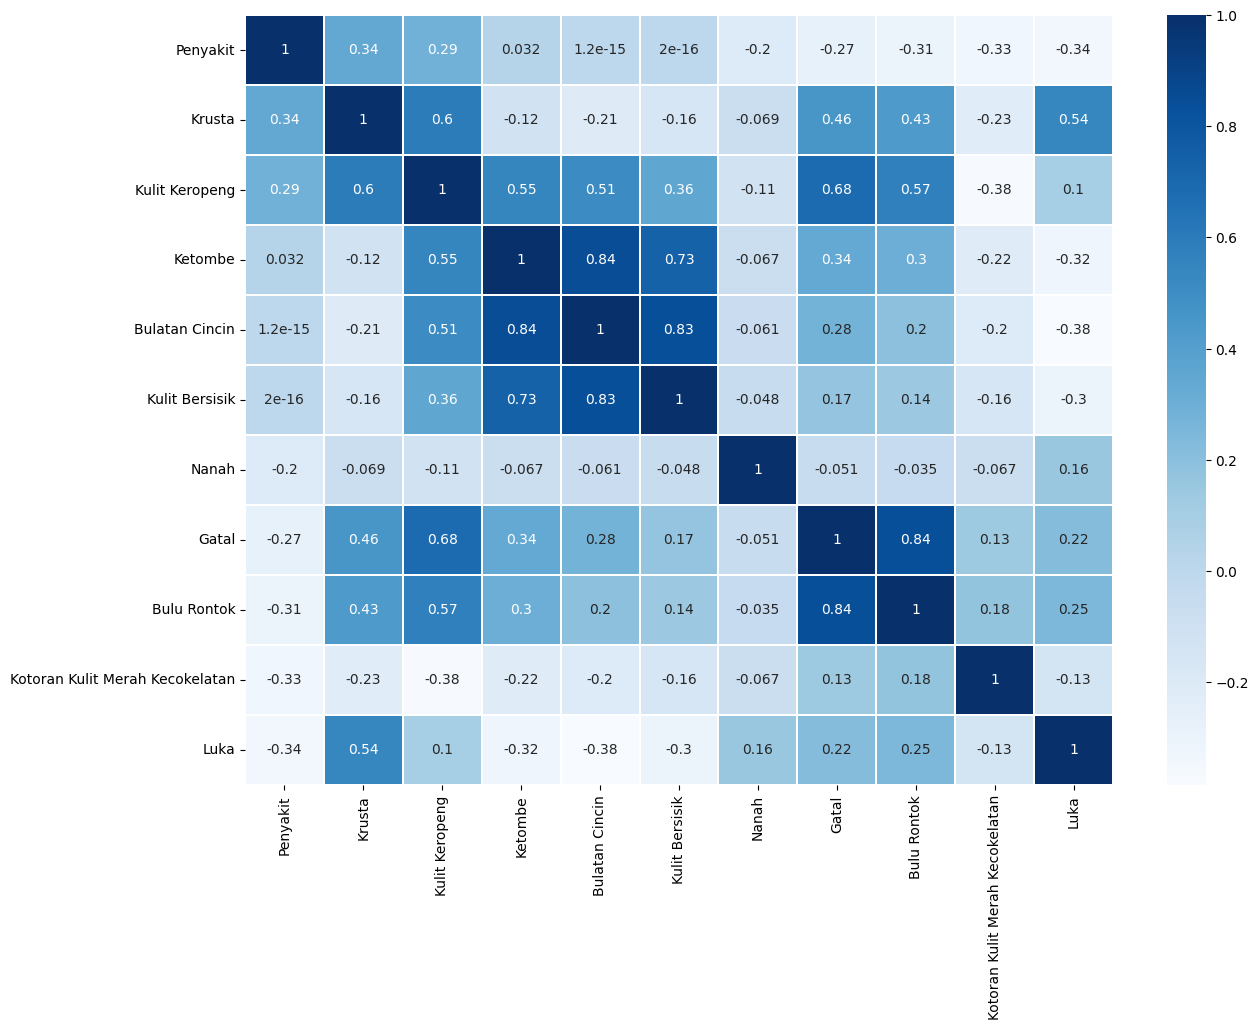

In [ ]:
sns.heatmap(df_fix.corr(), annot=True, cmap='Blues', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

## **Split Data**

In [ ]:
X = df_fix.drop(columns=['Penyakit'])
y = df_fix['Penyakit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

## **Standard Scaling**

In [ ]:
# standard_scaler = StandardScaler()
# X_train = standard_scaler.fit_transform(X_train)
# X_val = standard_scaler.transform(X_val)
# X_test = standard_scaler.transform(X_test)

## **Modeling**

In [ ]:
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
250/250 [==============================] - 2s 4ms/step - loss: 0.4988 - accuracy: 0.8708 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9974 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.9983 - val_loss: 3.5111e-04 - val_accuracy: 1.0000
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.9994 - val_loss: 1.0065e-04 - val_accuracy: 1.0000
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 3.5522e-05 - val_accuracy: 1.0000
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 1.8912e-05 - val_accuracy: 1.0000
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 8.4127e-06 - val_acc

In [ ]:
unique_categories = sorted(set(label_encoder.classes_))
encoded_array = list(unique_categories)
encoded_array

['Dermatitis', 'Flea Allergy', 'Jamur', 'Scabies', 'Sehat']

32/32 [==============================] - 1s 5ms/step


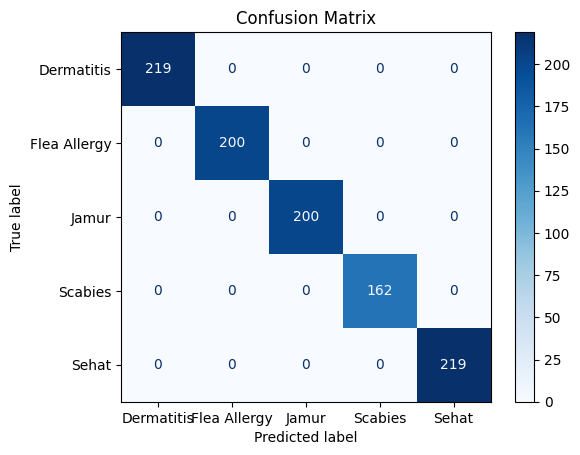

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoded_array)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score

# model = XGBClassifier(iterations=2000, learning_rate=0.1)

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

## **Save Model**

### **H5**

In [ ]:
os.makedirs('model/h5/', exist_ok=True)

save_model(model, "model/h5/model.h5")

<ipython-input-32-6526dd724935>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "model/h5/model.h5")


### **HDF5**

In [ ]:
os.makedirs('model/hdf5/', exist_ok=True)

json_model = model.to_json()
with open('model/hdf5/skin_diseases_model.json', 'w') as json_file:
    json_file.write(json_model)

model.save_weights('model/hdf5/skin_diseases_weights.weights.h5')

# with open(f'model/hdf5/standard_scaler.pkl', 'wb') as handler:
#     pickle.dump(standard_scaler, handler)

In [ ]:
folder = "hdf5/"

with open(f'model/{folder}skin_diseases_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
    test_model = tf.keras.models.model_from_json(loaded_model_json)

test_model.load_weights(f'model/{folder}skin_diseases_weights.weights.h5')

test_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# with open(f'model/{folder}standard_scaler.pkl', 'rb') as handler:
#     standard_scaler = pickle.load(handler)

In [ ]:
# model_pred = test_model.predict(standard_scaler.transform(np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])))
model_pred = test_model.predict(np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))
y_pred_class = np.argmax(model_pred, axis=1)
print(model_pred)
print("Class:", y_pred_class)

1/1 [==============================] - 9s 9s/step
[[7.4402912e-08 4.6340340e-08 7.2253203e-09 8.7690752e-09 9.9999988e-01]]
Class: [4]


### **TFJS**

In [ ]:
tfjs.converters.save_keras_model(model, "model/tfjs/")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
